In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/home/sk-ji/Downloads/sbi.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
df.isnull().sum()


age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

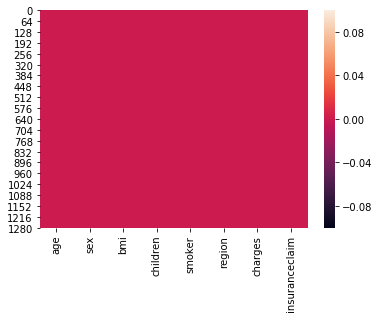

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [10]:
df.shape

(1338, 8)

In [22]:
data.corr()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


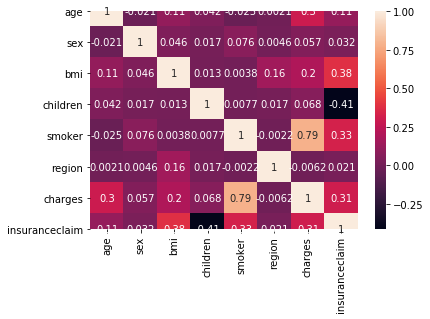

In [25]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [12]:
df.info

<bound method DataFrame.info of       age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]>

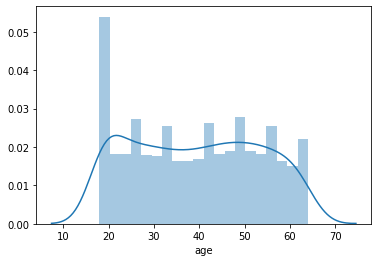

In [13]:
sns.distplot(df.age,bins=20)


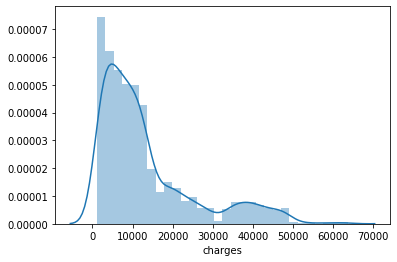

In [14]:
sns.distplot(df.charges)


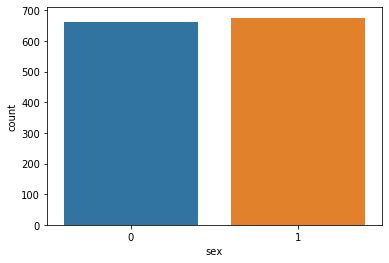

In [17]:
sns.countplot(x=df['sex'])


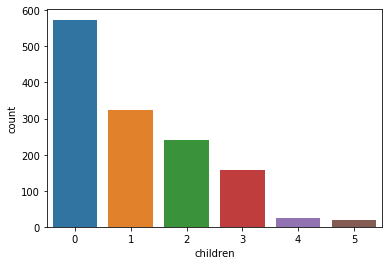

In [20]:
sns.countplot(df['children'])


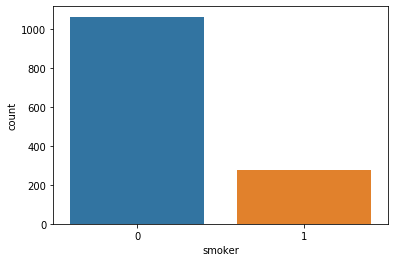

In [21]:
sns.countplot(df['smoker'])


In [28]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [29]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

df_x=data.drop('insuranceclaim',axis=1)
df_y=data.insuranceclaim

In [30]:
results = pd.DataFrame(columns=['model','Accuracy_Score','ROC AUC',])


In [31]:
models_name = ['Log_Reg','Decs_Tree','Rd_F','KNN','SVC']

In [32]:
model_list = [lr(),dt(),rf(),knn(),SVC()]

In [33]:
kfold = KFold(n_splits=5,shuffle=True,random_state=100)

for idx,model in enumerate(model_list):
    print('1')
    score=cross_val_score(model,df_x,df_y,scoring='roc_auc',cv=kfold)
    print('2')
    x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=42,test_size=0.15)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_scr = accuracy_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    results.loc[idx] = [models_name[idx],acc_scr,roc_auc]

results    

1
2
1
2
1


/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

2
1
2
1


/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/

2


,model,Accuracy_Score,ROC AUC
0,Log_Reg,0.815920,0.794163
1,Decs_Tree,0.975124,0.970868
2,Rd_F,0.905473,0.906663
3,KNN,0.621891,0.609711
4,SVC,0.636816,0.550103


In [35]:
from sklearn.externals import joblib 


In [38]:
joblib.dump(rf(), 'sbi_rf.pkl')


['sbi_rf.pkl']